<a id="0"></a>
## Sentiment Analysis on Tripadvisor Reviews

### Content
* [1. Introduction](#1)

    * [1.1 Domain-specific area](#1.1)
    * [1.2 Objectives](#1.2)
    * [1.3 Dataset](#1.3)
    * [1.4 Evaluation Methodology](#1.4)

* [2. Implementation](#2)

    * [2.1 Preprocessing](#2.1)
    * [2.2 Data Analysis](#2.2)
    * [2.3 Baseline](#2.3)
    * [2.4 Classification](#2.4)
        
* [3. Conclusions](#3)        

    * [3.1 Evaluation](#3.1)
    * [3.2 Summary and Conclusions](#3.2)
    
* [References](#4)

<a id="1"></a>
## 1. Introduction

<a id="1.1"></a>
### 1.1 Introduction 

The hotel industry, one of the most important components of the wider service industry according to Statista was valued at USD 722 billion in 2022. [1]This market nowadays, heavily relies on the web for service quality analysis, advertisement and publicity, especially in websites like TripAdvisor, Booking, Trivago etc.
TripAdvisor is the most popular travel research platform where members can search for different destinations and accomodations and interact by leaving opinions based on their experience.[2] For various accommodation structures, this represents simultaneously an opportunity and a risk since most customers make their decision based on these reviews. Furthermore, these opinions can be used to understand the level of service. Different parties like customers and marketers, have done sentiment analysis on such reviews to gather insights into accommodation structures or to conduct market analysis.

Sentiment analysis, also known as opinion mining, is a type of natural language processing whose purpose is to perform the task of detecting, extracting, and classifying opinions, sentiments, and attitudes concerning different topics expressed in a text.[3] Sentiment analysis helps businesses communicate better with customers, because by identifying their emotions, they have a clearer view of their customer experience. Moreover, it helps boost business performance and strategy and take quick action against poor customer experience. [4]

<a id="1.2"></a>
### 1.2 Objectives

In this project, we will attempt to conduct sentiment analysis on TripAdvisor hotel reviews using various different machine learning algorithms. To achieve this we are going to use a dataset containing hotel reviews in an attempt to classify the polarity of the review, whether it is neutral, positive or negative, without assigning a score to each sentiment. TripAdvisor reviews are texts containing words, numbers, and special characters like emoticons or links, that need to be detected before classifying the reviews. After detecting and normalizing the main features of each review, the classification process will execute several machine learning algorithms. The classifiers that are going to be implemented are Logistic Regression, Random Forest, KNeighbors classifier, Decision Tree and Naive Bayes, which are going to use unigrams and bigrams as features.

Businesses around the world usually rely on reviews to better understand customer satisfaction. Online review platforms like TripAdvisor use a star rating system. However, many businesses do not have such rating systems. Therefore, the main objective of this work is that by classifying different Tripadvisor hotel reviews, we are able to provide a sentiment for each review which can help both consumers and business owners understand how valuable their service is.

<a id="1.3"></a>
### 1.3 Dataset

For this project, we are going to use the TripAdvisor Hotel Review dataset from Kaggle. The dataset can be downloaded from here:

[TripAdvisor Hotel Review](https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews)

Overall, the dataset talks about the opinions about their experiences left by clients who have resided in different accommodation structures (hotels) around the world. The data has been web-scrapped from the TripAdvisor website and has already undergone some cleaning techniques. It is in the form of a comma-separated values file with two columns. The first column contains the reviews left by the clients, and the second column contains the star-based ratings. The file contains around 20.000 reviews and is quite imbalanced.

The reviews contain only letters and numbers and are already converted into lowercase and cleaned from emoticons and some symbols. The ratings variable is already labeled from 1 to 5 stars. However, for this project we are going to transform our output variable and consider ratings bigger than 3 as positive, ratings smaller than 3 as negative, and the remaining ratings as neutral. After this transformation, the variable class will have around 15.000 positive reviews, 3000 negative reviews, and nearly 2000 neutral reviews. For this dataset we are going to conduct some preliminary statistical analysis in section 2.2.

<a id="1.4"></a>
### 1.4 Evaluation methodology

The problem of mining imbalanced data sets is encountered problem in several real life applications like social sciences, customer retention, segmentation etc. [4] Since we are dealing with a multi-class classification problem with imbalanced data, the use of a standard evaluation methodology like accuracy would not be a good choice because the result would be biased towards the majority class. Some of the most used metrics for these kinds of problems are the confusion matrix and the F1 score. In this case the problem we are dealing with is a three-class problem, so we are going to use a three by three confusion matrix.

Confusion matrixes give a better idea of what the classification model is predicting right and the types of errors it is making. Meanwhile, the F1 score which is the harmonic mean of precision and recall, takes into account how the data is distributed and provides a more significative result compared to the accuracy metric. Besides the overall F1 score, another important score to take into consideration is the F1 score for the Negative class. In most cases, negative reviews tend to get a greater attention by businesses because the information extracted from these reviews can be used to enhance the level of service.

<a id="2"></a>
## 2. Implementation

<a id="2.1"></a>
### 2.1 Preprocessing

In this section we are going to import the necessary datasets, apply some preprocessing techniques, divide the data into train and test, and apply the Term Frequency-Inverse Document Frequency algorithm to quantify the importance or relevance of each word in the whole review.

Reviews extracted from Tripadvisor might be noisy, so certain preprocessing techniques need to be applied to clean and normalize the dataset. This dataset has already been partially normalized. The data is already lowercased and some symbols are removed.In this section, we are going to apply the following preprocessing steps:

- Remove punctuations
- Remove numbers
- Remove stop words
- Tokenize
- Lemmatize

Furthermore, as stated in the introduction, we are going to transform our 5-class star-based ratings into a 3-class review sentiment variable.

In [1]:
# Import necessary libraries for this project

# Dependencies for handling data plotting and regular expression operations
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


# Preprocessing and evaluation dependencies
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

# Dependencies for hyperparameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Lexicon-based model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
# Read the csv data
df=pd.read_csv('tripadvisor_hotel_reviews.csv')

In [3]:
# Remove punctuations
df["Clean_review"] = df["Review"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...'@#_]", " ", s).split()))

# Remove numbers
df["Clean_review"].replace('d+', '', regex=True, inplace=True)

# Remove stop words
stop = set(stopwords.words('english'))
def remove_stopwords(input_text):
    """
    Function for removing stopwords.
    Splits all words present in each review.
    Removes stopwords.
    Joins into a clean review the remaining words for each raw review.
    
    Parameters
    ----------
    input_text : reviews series
    """
    words = input_text.split()
    clean_words = [word for word in words if word not in stop] 
    clean_text = " ".join(clean_words) 
    return clean_text
# Apply the remove stopwords function
df["Clean_review"] = df["Clean_review"].apply(lambda x: remove_stopwords(x))

# Tokenization                                                                        
df['Clean_review'] = df['Clean_review'].apply(word_tokenize) 

# Normalize words
lemmatiser = WordNetLemmatizer()
df["Clean_review"] = df["Clean_review"].apply(lambda tokens: " ".join([lemmatiser.lemmatize(token, pos='v') for token in tokens]))

In [4]:
# Label transformation
def label_transform(rating):
    """
    Function for transforming star based ratings into sentiment.
    Returns Negative for 1 star and 2 star ratings, Neutral for 3 star ratings
    and Positive for 4 star and 5 star ratings.
    
    Parameters
    ----------
    rating : star ratings 
    """
    if rating == 1 or rating == 2:
        return "Negative"
    if rating == 3:
        return "Neutral"
    if rating == 4 or rating == 5:
        return "Positive"
    
# Apply label transformation function to the Rating variable
df["Sentiment"] = df["Rating"].apply(lambda x: label_transform(x))

In [5]:
# Divide the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df['Clean_review'], df['Sentiment'], 
                                                    stratify=df['Sentiment'], test_size=0.2, random_state=0)

In [6]:
# Apply the TF-IDF Vectorizer
tfid = TfidfVectorizer(ngram_range = (1, 2))
train_tfid_matrix = tfid.fit_transform(X_train)
test_tfid_matrix = tfid.transform(X_test)

<a id="2.2"></a>
### 2.2 Data Analysis

In this section we are going to plot the output variable class distribution. We are going to create a new variable containing the length of each review and plot wordclouds for each sentiment class. From the plots below we can see that nearly 70% of the reviews are positive. Negative reviews tend to be longer than neutral or positive reviews. As for the wordclouds, the words tend to be the same, and no information about class differences can be extracted from them.

[Text(0, 0, 'Positive'), Text(1, 0, 'Negative'), Text(2, 0, 'Neutral')]

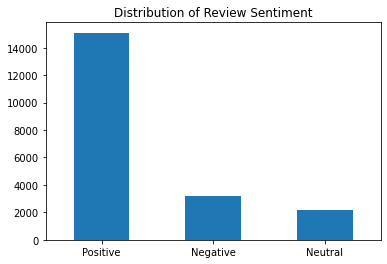

In [7]:
# Plot the dataset distribution
ax = df['Sentiment'].value_counts().plot(kind='bar', title='Distribution of Review Sentiment',
                                               legend=False)
ax.set_xticklabels(['Positive','Negative','Neutral'], rotation=0)

[Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')]

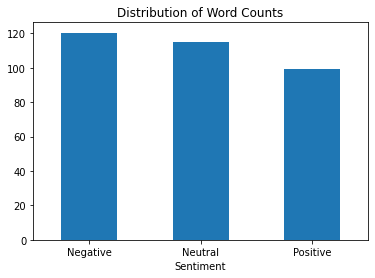

In [8]:
# Create word count variable
df['word_count'] = [len(x.split()) for x in df['Review'].tolist()]

# Plot the average word counts per label
ax = df.groupby('Sentiment')['word_count'].mean().plot(kind='bar', title='Distribution of Word Counts',
                                               legend=False)

ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)

In [9]:
# Plot the word cloud for each label
def plot_review_wordcloud(sentiment):
    """
    Function for plotting a wordcloud for each sentiment category.
    Plots a wordcloud containing the most frequent words and a list containing
    10 most common words and their count.
    
    Parameters
    ----------
    sentiment : sentiment category
    """
    review = df['Review'].loc[df['Sentiment'] == sentiment]
    plt.figure(figsize = (20,20))
    wc = WordCloud(max_words = 1000 , width = 1200 , height = 600,
                   collocations=False).generate(" ".join(review))
    print(Counter(" ".join(review).split()).most_common(10))
    plt.imshow(wc)

[('not', 8706), ('hotel', 6643), ('room', 6500), ("n't", 3872), ('no', 3467), ('did', 3041), ('staff', 2091), ('just', 2039), ('stay', 1999), ('rooms', 1996)]


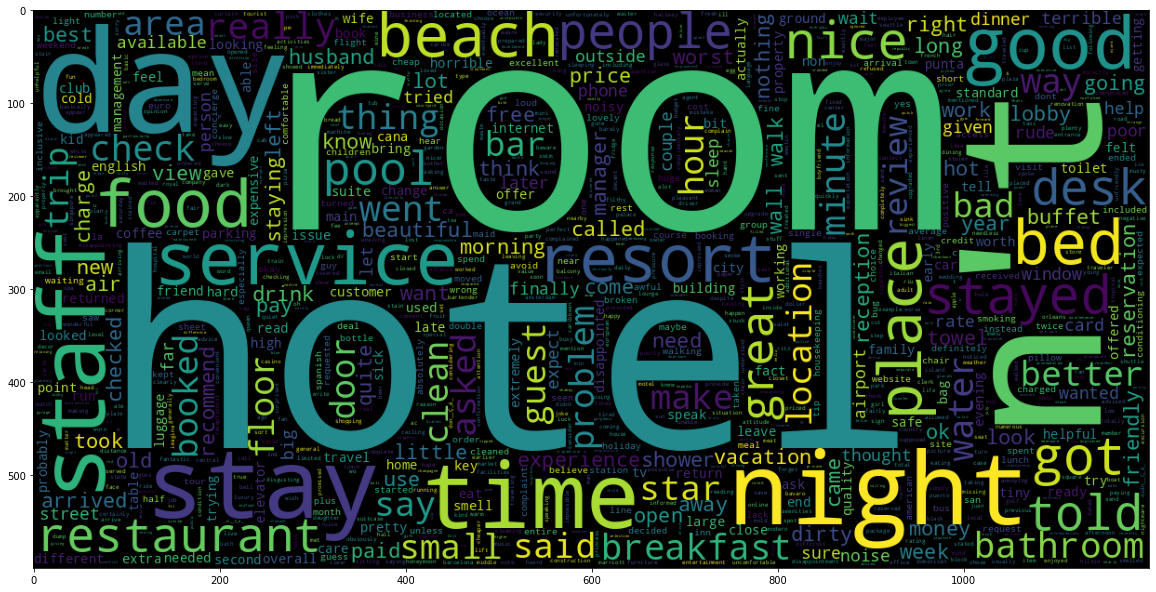

In [10]:
plot_review_wordcloud('Negative')

[('hotel', 30969), ('room', 20095), ('not', 17415), ('great', 16165), ("n't", 12056), ('staff', 11488), ('good', 10795), ('just', 8969), ('did', 8519), ('stay', 8278)]


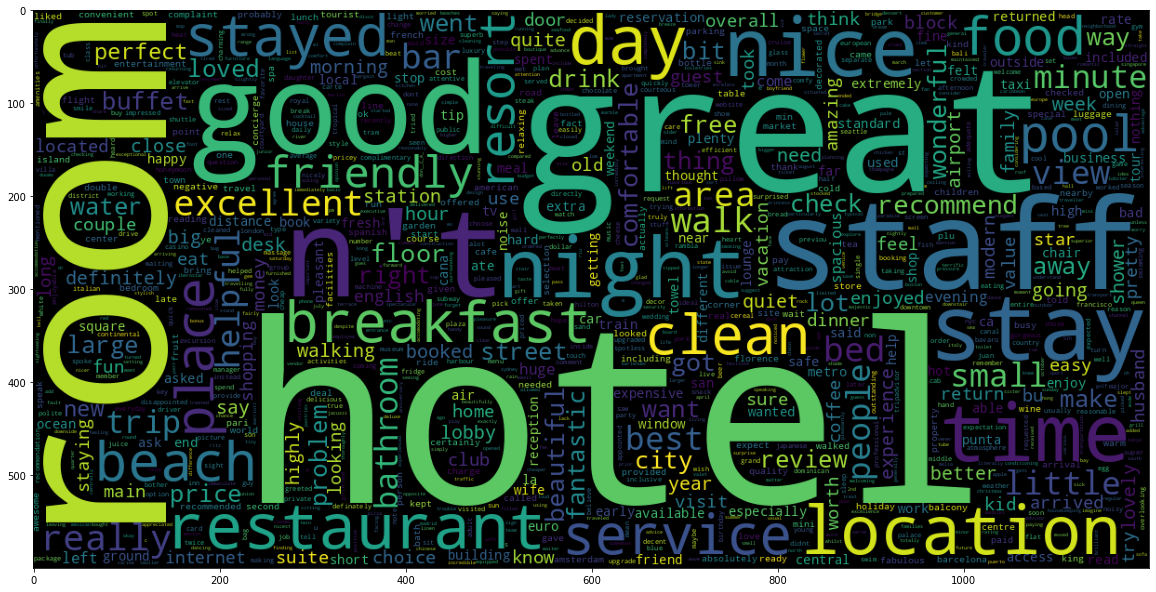

In [11]:
# Plot the wordcloud for the Positive class
plot_review_wordcloud('Positive')

[('not', 4629), ('hotel', 4467), ('room', 3937), ("n't", 2508), ('good', 2167), ('did', 1873), ('no', 1610), ('great', 1536), ('nice', 1524), ('just', 1450)]


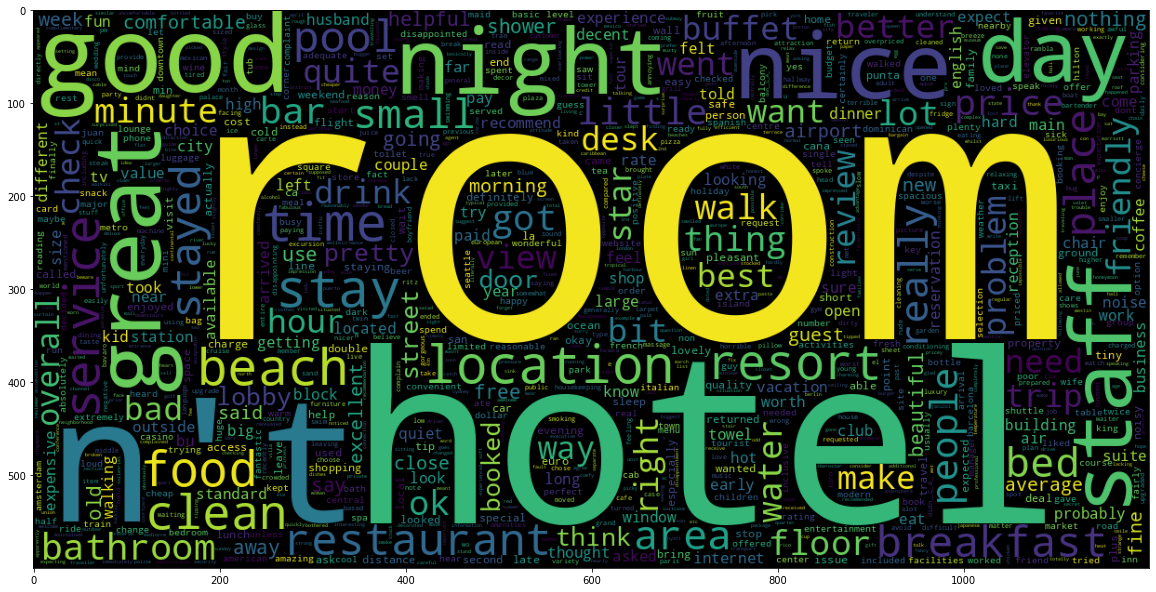

In [12]:
# Plot the wordcloud for the Neutral class
plot_review_wordcloud('Neutral')

<a id="2.3"></a>
### 2.3 Baseline

For a baseline, we will use a lexicon and rule-based approach. More specifically the VADER (Valence Aware Dictionary and
sEntimentReasoner) sentiment analysis tool, an open source under the MIT license thet performs well in the social media domain and product reviews. It uses a combination of a sentiment lexicon, a list of lexical features which are generally labeled according to their semantic orientation as either positive or negative. It does not only tell about the positivity and negativity score but also tells about how positive or negative a sentiment is.[5]

Using this baseline model, we will achieve a classification accuracy of 77%. The model is quite performant with the majority class, but very poor with the other classes. The precision score for the Negative class is high, but the recall accuracy is very low, meaning that almost 80% of negative reviews are classified as neutral or positive reviews.

In [13]:
def sentiment_analysis(data):
    """
    Function for running vader sentiment analysis to a set of data.
    Returns Positive if the polarity score is bigger than 0.05, negative if it is smaller
    than -0.05 and Neutral for the remaining polarity values.
    
    Parameters
    ----------
    data : set of data containing reviews
    """
    analyzer = SentimentIntensityAnalyzer()
    data['Vader_Subjectivity'] = [analyzer.polarity_scores(x)['compound'] for x in data['Clean_review']]
    def sentiment(score):
        if score >= 0.05 :
            emotion = "Positive"
        elif score <= - 0.05 :
            emotion = "Negative"
        else :
            emotion = "Neutral"
        return emotion
    data['Vader_Subjectivity'] = data['Vader_Subjectivity'].apply(sentiment)
    return data
# Run sentiment analysis to our dataframe
sentiment_analysis(df)

,Review,Rating,Clean_review,Sentiment,word_count,Vader_Subjectivity
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive park get goo eal stay hot...,Positive,87,Positive
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge iamon member hilton ...,Negative,250,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice room 4 * experience hotel monaco seattle ...,Neutral,217,Positive
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonerful time hotel monaco l...,Positive,89,Positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,Positive,191,Positive
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best keep secret 3r time stay charm 5-star ca ...,Positive,109,Positive
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,Positive,39,Positive
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice moern outsie esk staff n particul...,Negative,63,Positive
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruine vacation hotel opene sept 17...,Negative,781,Positive


In [14]:
# Visualize vader predictions
df['Vader_Subjectivity'].value_counts()

Positive    19592
Negative      793
Neutral       106
Name: Vader_Subjectivity, dtype: int64

In [15]:
# Visualize real values
df['Sentiment'].value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: Sentiment, dtype: int64

Now, let's show the confusion matrix and classification report for the baseline model.

In [16]:
# Print confusion matrix and classification report
print(confusion_matrix(df['Sentiment'], df['Vader_Subjectivity']))
print(classification_report(df['Sentiment'], df['Vader_Subjectivity']))

[[  661    66  2487]
 [   68    18  2098]
 [   64    22 15007]]
              precision    recall  f1-score   support

    Negative       0.83      0.21      0.33      3214
     Neutral       0.17      0.01      0.02      2184
    Positive       0.77      0.99      0.87     15093

    accuracy                           0.77     20491
   macro avg       0.59      0.40      0.40     20491
weighted avg       0.71      0.77      0.69     20491



<a id="2.4"></a>
### 2.4 Classification

In this section we will perform experiments using some of the most popular machine learning classifiers for natural language processing like Decision Tree Classifier, Random Forest Classifier, Logistic Regression, KNeighbors Classifier and Naive Bayes Classifier.

There are many ways to do resampling to an imbalanced dataset. We will use SMOTE (Synthetic Minority Oversampling Technique) that will randomly generate new replicates of our undersampling data to balance our dataset.

In [17]:
# Apply oversampling to the train data
X_train_sm, y_train_sm = SMOTE().fit_resample(train_tfid_matrix, y_train)

In [18]:
# Define the models that are going to be used
classifiers = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          LogisticRegression(max_iter=1000),
          KNeighborsClassifier(),
          MultinomialNB()]

In [19]:
def train_models(models):
    """
    Function for training various machine learning classifiers using a stratified 3-fold cross validation method.
    Returns a pandas dataframe with the models and their accuracy.
    
    Parameters
    ----------
    models : set of sklearn classifiers
    """
    accuracy = []

    for model in models:
        cross_val = cross_val_score(model, X_train_sm, y_train_sm, scoring='f1_micro',
                               cv=StratifiedKFold(3)).mean()
        accuracy.append(cross_val)
    models_name = ['DecisionTreeClassifier', 'RandomForestClassifier',
         'LogisticRegression', 'KNeighborsClassifier', 'MultinomialNB']

    accuracies = pd.DataFrame({'Model': models_name, 'Accuracy': accuracy})
    return accuracies

# Run the training function
train_models(classifiers)

,Model,Accuracy
0,DecisionTreeClassifier,0.809177
1,RandomForestClassifier,0.936033
2,LogisticRegression,0.964607
3,KNeighborsClassifier,0.659875
4,MultinomialNB,0.892634


In [20]:
# Tune the best model
# Model
model = LogisticRegression()

# Hyperparameter values to tune
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_micro',error_score=0)
grid_result = grid_search.fit(X_train_sm, y_train_sm)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.986187 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.985745 (0.001337) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.984696 (0.001346) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.986187 (0.001262) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.982239 (0.001168) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.981696 (0.001161) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.981889 (0.001310) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.967221 (0.002148) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.967230 (0.002127) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.959021 (0.002303) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.895147 (0.004011) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.895147 (0.004004) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.875637 (0.003293) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.813704 (0.003695) wit

In [21]:
# Run final model with best hyperparameters
log=LogisticRegression(C=100, penalty='l2', solver= 'liblinear', max_iter=1000)
log.fit(X_train_sm, y_train_sm)
pred = log.predict(test_tfid_matrix)

In [22]:
# Print confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 507   64   72]
 [  95  125  217]
 [  33   58 2928]]
              precision    recall  f1-score   support

    Negative       0.80      0.79      0.79       643
     Neutral       0.51      0.29      0.37       437
    Positive       0.91      0.97      0.94      3019

    accuracy                           0.87      4099
   macro avg       0.74      0.68      0.70      4099
weighted avg       0.85      0.87      0.86      4099



<a id="3"></a>
## 3. Conclusions

<a id="3.1"></a>
### 3.1 Evaluation

After picking the best classifier algorithm, we tuned its hyperparameters and ran the final model on the entire data. The model managed to achieve an overall accuracy of 87% in the test set. This accuracy was 10% higher than the baseline model. Moreover, the accuracy of the Positive class rose by 7% and the accuracy of the neutral class compared to the lexicon-based model went from 2% to 37%.

The most important result was the performance the model had on the Negative class. The accuracy of the Negative class went from 33% to 79% meaning that the Logistic Regression model did a very good job predicting negative reviews, which usually are the most important and need to be taken care of. Even though the baseline model had good precision accuracy, recall accuracy was quite low and nearly 80% of the negative reviews were classified as neutral or positive. The Logistic regression model reduced the number of misclassified negative reviews by nearly 60%.

<a id="3.2"></a>
### 3.2  Summary and Conclusions

The TripAdvisor reviews used in this project contained only letters and numbers and were already converted into lowercase and cleaned from emoticons and some symbols. Before training the dataset, we preprocessed the reviews to make them suitable for feeding into our models. Several machine learning models like Logistic Regression, Naive Bayes, Random Forest, Decision Tree and KNeighbors were implemented to the data.

Since our data was imbalanced, to avoid the bias towards the majority class, the custom matrix and the F1 score were used. These metrics gave a better idea of what the classification model was predicting right and the types of errors that were made. Furthermore, they took into account how the data was distributed.

From the classifiers we chose for this analysis sentiment project, the classifier with the best accuracy was Logistic Regression. Other classifiers like Random Forest and Multinomial Naive Bayes produced good results although lower than Logistic Regression, while classifiers like Decision Tree and KNeighbors were not as performant as the others, especially the last one. For each of these models, two types of features were used: unigrams and bigrams. The augmentation of the feature vector with the bigrams improved the accuracy.

The results we quite satisfying compared to the baseline model. However, there might be room for improvement, probably using other types of model. For example, the same approach can be replicated by using deep learning natural processing techniques or other lexicon-based techniques (e.g., Text Blob). 

Deep Learning techniques like Convolutional Neural Networks and Long Short-Term Memory have produced the best results in various sentiment analysis projects.[6][7] These techniques, however, due to their powerful expression ability, will generate a lot of useless parameters, meaning that a huge amount of data will be needed to train the network. Furthermore, these models are computationally expensive. Lexicon techniques like TextBlob, on the other hand, are all based on artificial dictionaries, with limited coverage and artificial errors, and in some cases have been less performant than Vader [5] which in this project did not achieve good results.

<a id="4"></a>
### References

1. Topic: Hotel industry worldwide (2022) Statista. Available at: https://www.statista.com/topics/1102/hotels/#dossierKeyfigures (Accessed: December 21, 2022).
2. Cunningham, Padraig & Smyth, Barry & Wu, Guangyu & Greene, Derek.  Does TripAdvisor Makes Hotels Better?. (2010).
3. Gutiérrez, Luis, Juan Bekios-Calfa, and Brian Keith. A review on bayesian networks for sentiment analysis. International Conference on Software Process Improvement. Springer, Cham, (2018).
4. Top 5 benefits of sentiment analysis for businesses (2022) AIMultiple. Available at: https://research.aimultiple.com/sentiment-analysis-benefits/#:~:text=Sentiment%20analysis%20helps%20companies%20communicate,a%20decrease%20in%20customer%20churn (Accessed: December 22, 2022). 
5. A comprehensive study on lexicon based approaches for sentiment analysis (2020). Available at: https://www.researchgate.net/profile/Janardhan-Naulegari/publication/333602124_A_Comprehensive_Study_on_Lexicon_Based_Approaches_for_Sentiment_Analysis/links/5d13452ca6fdcc2462a688ed/A-Comprehensive-Study-on-Lexicon-Based-Approaches-for-Sentiment-Analysis.pdf (Accessed: December 23, 2022). 
6. Dang, N.C., Moreno-García, M.N. and De la Prieta, F. Sentiment analysis based on Deep Learning: A Comparative Study, Electronics, 9(3), p. 483 (2020).
7. Yadav, A., Vishwakarma, D.K. Sentiment analysis using deep learning architectures: a review. Artif Intell Rev 53, 4335–4385 (2020).

[Back to top](#0)